# Part 2 Regression: Discuss and analyse whether there is a relationship between the total bill and tip amount.
In this section I will look at the relationship between the total bill and the tip amount using regression. My primary references are lecture notes and chapter 9 of Experiment Design and Analysis by Howard J Seltman and also [hacker earth blog post on regression analysis](https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-guide-regression-analysis-plot-interpretations/tutorial/)

***
### Multivariate non graphical EDA of the Tips dataset.

Part 1 above described the variables in the Tips dataset using statistics and some plots to visualise the distribution of the data in the Tips dataset.

Following "Experimental Design and Analysis" by Howard J. Seltman the next step would be to do some multivariate non-graphical exploratory data analysis and then some graphical analysis. Cross tabulation is the basic non-graphical EDA technique where two way tables are constructed using the levels of one variable against the levels of another variable. It can also be used for more than two variables by cross tabulating two or more variables against each level of a third variable. 

Part 2 concerns the relationship between the total bill amount and the tip, if there is one. Therefore this section will focus on these two variables. Further multivariate analysis using additional variables will be the focus of part 3 which will look at relationship between the variables within the dataset.

#### Correlation and Covariance of Total Bill and Tip amounts
For two quantitative variables such as the total bill amount and the tip amount, the covariance and correlation are statistics of interest. The correlation is a statistical method used to determine whether a linear relationship between variables exists and shows if one variable tends to occur with large or small values of another variable.

The correlation statistics are computed from pairs of arguments. The correlation of the measurements can be got using the pandas `corr` method on the dataframe. If there is a strong positive relationship between the variables, the value of the correlation coefficient will be close to 1, while a strong negative relationship will have a correlation coefficient close to -1. A value close to zero would indicate that there is no relationship between the variables.

The covariance is a measure of how much two variables vary with each other and shows how much and in what direction one variable will change when another one does. If a covariance is positive then when one measurement is above it's mean then the other measurement will more than likely be above it's mean and vice versa while with  a negative covariance when one variable is above the mean the other measurement is likely to be below it's mean. A zero covariance implies that the two variables vary independently of each other. The correlation is easier to interpret than the covariance. 
Correlation does not depend on units of measurement and does not depend on which variable is x or y. $r$ is the symbol used for sample correlation and $\rho$ is the symbol for the population correlation.

#### Correlation and Covariance statistics for Total bill and Tip amount.

Using the `corr` function on the tips dataframe will include a correlation statistic for the Total Bill against Tip. Size is also included (number of people in a dining party).

In [30]:
# calculating correlation on the numerical variables of Tips dataset
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [32]:
# correlation of total bill and tip amounts.
df['total_bill'].corr(df['tip'])

0.6757341092113641

In [31]:
# covariance of the 3 numerical variables in tips dataset
df.cov()

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


In [33]:
df['total_bill'].cov(df['tip'])

8.323501629224854

The correlation between the total bill amount and the tip is positive and quite high at 0.67 which implies that tip amount is indeed related to the total bill amount. The relationship is quite strong but it does not seem to be the only factor. The size of the party can also be seen to have an influnce here with a positive value of 0.49.   
Correlation however is not the same as causation! There can be many possible relationships between variables that are correlated such as cause and effect relationship and also reverse cause and effect. In other cases the observed correlation between variables may be due to the effects of one or more other variables so while it might seem that the total bill is correlated with the tip amount, it is possible that the other variables such as the size of the party or day of week have some influnce. Often a relationship between variables might be just coincidental.

#### Scatter plots

Seaborn's strength is in [visualizing statistical relationships](https://seaborn.pydata.org/tutorial/relational.html#visualizing-statistical-relationships) and showing how variables in a dataset relate to each other and also how these relationships may depend on other variables. 
>Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

Scatter plots are used to visualise relationships between two numerical variables such total bill and tip amount. The (Pearson's) correlation coefficient shows the strength of the relationship. 
A scatter plot is a plot of the ordered pairs of numbers consisting of the independent variable x  and the dependent variable y. It shows the joint distribution of two variables where each point represents an observation in the dataset and can be used to spot relationships. 


#### Scatter plot of Total Bill amount and Tip amounts.
Here scatter plots are drawn using the seaborn `scatterplot` function where the total bill is shown along the vertical axis and the tip amounts along the vertical axis. Each point is an actual observation is the Tips dataset with a total bill amount and the corresponding tip amount paid with that bill.

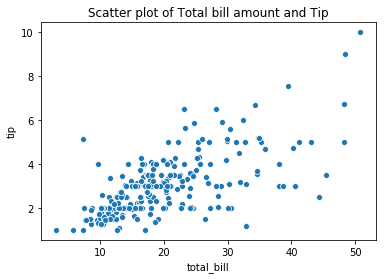

In [28]:
# create the plot
sns.scatterplot(x=df['total_bill'],y=df['tip'])
# add title
plt.title("Scatter plot of Total bill amount and Tip")
plt.show()

The scatter plot shows that there does appear to be a positive linear relationship of sorts between the two variables total bill and tip amount with the points forming a line across the diagonal from the intersection of the axis up to the top right hand corner. The tip amount does appear to rise with the bill amount as would be expected although there are some observations that this does not seem to hold for. The plot shows a few higher tips for smaller total bills but there are quite a number of observations where the tip seems quite small in comparison to the total bill size. These are the points on the bottom right hand side of the plot under the line and they do not seem to follow the same trend of higher bill amounts leading to corresponding high tip amounts. 

As the correlation coefficients and the scatter plots indicate that there is a linear relationship between total bill and tip amount the next step then is to look at regression.

Seaborn plots can be used to show the scatter plots and joint distribution of two variables but in addition to this statistical models can be used to estimate a simple relationship between two noisy sets of observations. Seaborn's regression plots are mainly used to visualise patterns in a dataset during the exploratory data analysis and are not meant to be used for statistical analysis as such. The seaborn documentation recommends using the `statsmodels` package for looking at more quantitative measures concerning the fit of the regression models. Seaborn plots can be used to quickly and easily visualise a dataset when exploring the dataset on top of looking at the summary statistics. As the saying goes a picture paints a thousand words!


### Regression.

Regression is the method used to find the equation of the line that best fits the data (where the best fit is when the sum of the squared vertical distances from each point to the regression line is at a minimum.) 
It is a statistical method used to describe the nature of the relationship between variables which can be positive or negative, linear or non-linear.  It can be used to see whether two or more variables are related and if so what is the strength of the relationship. Also what kind of relationship exists and whether predictions can be made from the relationship.

The goal of regression here is to relate two numerical variables in the Tips dataset to each other, specifically the tip amount and the total bill amount. Is the tip amount related to the total bill amount, how and by how much. Can you predict the tip amount if you know the bill amount?


**Simple linear regression** is a common method for looking at relationships between a single explanatory variable and a single quantitative outcome variable. Simple linear regression can therefore be used here to explore any relationship between the total bill amount as the explanatory variable and the tip amount as the outcome variable. Simple refers to there being only one explanatory variable. 

In the Tips dataset there are 229 different observed values of the total bill amount but there are many amounts in between these exact bill amounts that could be assumed to also possible values of the explanatory variable. 
(There are only 123 unique tip amounts!).

In [30]:
print(f"There are {len(df['total_bill'].unique())}  unique total bill amounts")
print(f"There are {len(df['tip'].unique())}  unique tip amounts")


There are 229  unique total bill amounts
There are 123  unique tip amounts


The scatter plot shows that there are many set of observations or points that seem to fall around a line. 
All straight lines can be expressed in the form $y = mx +c$ where $m$ is the slope of the line and shows how much $y$ increases when $x$ is increased by one unit, $c$ is the y-intercept of the line which is the value of $y$ when $x$ is zero. Instead of using $c$ and $m$, $b_0$ can be used for the intercept and $b_1$ for the slope of the line. The equation of the line can therefore be expressed as $y = b_0 + b_1x$.

When finding a straight line to fit data you would looks for the best possible values for the slope and intercept parameters. Regression looks for the equation of the line that the points lie on.

Using linear regression a relationship can be considered between the population mean of the outcome tip variable and the explanatory total bill amount variable. $Y$ is usually used to denote the outcome variable and $x$ for the explanatory variable. The model is usually expressed as the expected value of Y given a particular value of x is equal to the intercept parameter $B_0$ and the slope parameter $B_1$. :
$$E(Y|x) = B_0 + B_1x$$
The structural model is that the explanatory and outcome variables are linearly related where the population mean of the outcome for any $x$ value is $B_0 + B_1x$.

For simple linear regression the usual null hypothesis is that $H_0: B_1=0$ and the alternative hypothesis is $H_1: B1 \neq 0$. If the null hypothesis is true then the population mean of $Y$ will be $B_0$ for every $x$ value and $x$ has no effect on $Y$. The alternate hypothesis is that changes in $x$ are associated with changes in $Y$. 

The hypothesis in this case is whether there is a linear relationship between the total bill and the tip amount. The model says that for each value of the total bill amount $x$, the population mean of Tip amount $Y$ (over all the observations that have that particular $x$ for their explanatory variable) can be calculated using the simple linear expression $B_0 + B_1x$. However as the exact values of two parameters are not known, estimates are made and substituted into this equation. The term *coefficient* is used for parameter or parameter estimates in the equation for predicting $Y$ from $x$.
The equation $E(Y|x) = B_0 + B_1x$ makes a prediction of the true mean of the outcome(Tip amount) for any fixed value of the explanatory variable (total bill amount). Seltman notes that while it is reasonable to interpolate and make predictions for unobserved $x$ values between the observed $x$ values it would be unwise to extrapolate and make predictions outside of the range of $x$ values studied. The model assumes linearity within the range of the obseved values.
There are also assumptions regarding the *errors* where an error in this context is the deviation of the true outcome value from the population mean of the outcome for a given $x$ value. These are known as the residuals

Using linear regression, a model can be used to make predictions for unobserved tip values in between the observed tip amounts but not for making predictions of tip amounts outside this range. 

When fitting a regression model to the data you look for a straight line with the best possible values for the slope and intercept parameters given the observed data. A cost function is used to estimate the parameter values for the model that minimise the cost function. 
Numpy has a function `polyfit` that performs this calculation and can be used to fit lines in many dimensions.


Below  am using the average tip rate as an initial estimate of the slope $m$ of the line. The minimum tip is 1 dollar so I will use this as the intercept.
First the actual observations are plotted, then look for a line that best fits the data.
The best line is considered the one that minimises the cost $Cost(m,c)$ of the Least Squares Lines $ \sum_i (y_i - mx_i - c)^2 $. Each $y_i$ is the corresponding value of Tip amount to each total bill amount $x_i$ in the dataset. These are actual measured values. $(x_i,y_i)$ is the ith point in the dataset.
The value $mx_i + c$ is what the model says that $y_i$ should have been. $y_i - mx_i - c$ is the difference between the observed $y_i$ values and the the value the model gives $(mx_i + c)$. These values are then squared.
Particular values of $m$ and $c$ will give the lowest values for this cost function which can be plotted on the scatter plot of actual observations. 

The lecture demonstrated how several lines can be drawn as estimates for the model that best fits the data with a given slopes and intercepts. A cost is then calculated for each line and the line with the lowest cost is considered the best fit for the data. A **cost function** is used to determine the best line to fit the data. However the data does not alway fit perfectly and therefore the cost is usually greater than zero. If I was to do this I would start with a guess of 15% for the slope using the typical tip rate of 15% and 1 as the intercept given the minimum tip in the dataset is 1 dollar.  Fortunately numpy's `polfit` function  can do this. 
(The actual calculations if this was done manually is below as per the lecture notes on simple linear regression.)

How much of the variance in $y$ that is determined by $x$ can be measured using the Coefficient of Determination also known as R Squared. The $R^2$ value is an estimate of how much the changes in the $y$ values (tip amount) is due to changes in the $x$ values (the total bill amoounts) compared to all the other factors that affect the $y$ value. 

$$ R^2 = 1 - \frac{\sum_i (y_i - m x_i - c)^2}{\sum_i (y_i - \bar{y})^2} $$

Sometimes the Pearson correlation coefficient is used instead of the R-squared value. The Pearson coefficient can be squared to get the R-squared value.  Numpy has a function `corrcoef()` that calculates this value. 

In [6]:
np.mean(df['tip']/df['total_bill'])

0.16080258172250478

#### Using the numpy `polyfit` function

In [11]:
x, y = df['total_bill'], df['tip']
np.polyfit(x,y,1)


array([0.105 , 0.9203])

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.ols('tip ~ total_bill', data=df).fit()
#results = sm.OLS(df['tip'],df['total_bill']).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 23 Nov 2019   Prob (F-statistic):           6.69e-34
Time:                        19:47:15   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

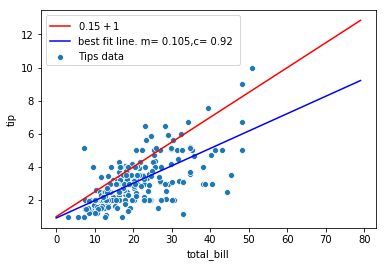

In [28]:
# overlay an estimate line on the plot
sns.scatterplot(x=df['total_bill'],y=df['tip'], label="Tips data")
x = np.arange(0, 80, 1)
# plot a line on the plot using 0.15 as slope and 1 as intercept
plt.plot(x, .15 * x +1, 'r' , label=r"$0.15 + 1$")
# plot a line using output from polyfit as slope and intercept as the best fit line
plt.plot(x, m*x + c, 'b-', label = "best fit line. m= 0.105,c= 0.92 ")
plt.legend()
plt.show()


##### Calculating the cost function manually

Calculating the best slope and intercept values
Here using the calculations as outlined in the lecture notes on linear regression.
This gives the same results as the numpy `polyfit` function.

In [23]:
# First the means of total_bill and tips
x_avg, y_avg = np.mean(df.total_bill), np.mean(df.tip)
print("The mean bill amount is $%.3f " %x_avg, "and mean tip amount is $%.3f" %y_avg)

## subtract means from each of the individual total_bill and tip values
x_zero= df['total_bill'] - np.mean(df['total_bill'])
y_zero= df['tip'] - np.mean(df['tip'])

# The best m is found by the following calculations:
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)

# use m from above to calculate the best c
c = y_avg - m* x_avg

print("m is %8.6f and c is %6.6f." %(m,c))

The mean bill amount is $19.786  and mean tip amount is $2.998
m is 0.105025 and c is 0.920270.


In [35]:
# Calculating the cost for various slope and intercept values
x, y = df.total_bill, df.tip
cost = lambda m,c: np.sum([(y[i] - m * x[i] - c)**2 for i in range(x.size)])
cost = lambda m,c: np.sum([(y[i] - m * x[i] - c)**2 for i in range(x.size)])
## first for a wild guess
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.15, 1.1, cost(0.15, 1.1)))
# using the estimates from the polyfit function
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.105, 0.9203, cost(0.105, 0.9203)))

Cost with m =  0.15 and c =  1.10:   570.90
Cost with m =  0.10 and c =  0.92:   252.79


The best values for $m$ and $c$ given the tips data and using the least squares fitting are 0.105 for $m$ and 0.9203 for $c$ which are the same as Numpy's `polyfit` function  of 0.105  and 0.9203 for the slope and intercept parameters. The $Cost$ of the best $m$ and the best $c$ is not zero in this case.

#### Calculating R squared - the coefficient of determination.

In [50]:
# Calculate the R-squared value for the Tips dataset
rsq = 1.0 - (np.sum((y - m * x - c)**2)/np.sum((y - y_avg)**2))
print("The R-squared value is %6.4f" % rsq)
# The same value using numpy.
print(f" Using numpy corrcoef:{np.corrcoef(x, y)[0][1]**2:.4f} ")

The R-squared value is 0.4566
 Using numpy corrcoef:0.4566 


### Summary of regression of total bill and tip amount.

- The correlation coefficient shows the stength and direction of the relationship between the variables. 

In [17]:
# correlation of total bill and tip amounts.
print("The correlation coefficient between total bill and tip amount is %.3f" %df['total_bill'].corr(df['tip']))

The correlation coefficient between total bill and tip amount is 0.676


- This is quite a strong positive relationship but it is not perfectly linear.
- The scatterplot is used to show the shape of the relationship.
- There can be two or more independent variable and one independent variable. While there is a relationship between the total bill amount and the tip amoount, we could also see that there is a positive relationship between the size of party and the tip amount. 
- The coefficient of determination (also known as R squared) is a better indicator of the strength of a linear relationship between total bill and tip amoount than the correlation coefficient because it shows the percentage of the variation of the dependent variable (tip) that is directly attributed to the independent variables (total bill). The $R^2$ value is an estimate of how much the changes in the $y$ values (tip amount) is due to changes in the $x$ values (the total bill amoounts) compared to all the other factors that affect the $y$ value. 

- Numpy `corrcoef()` function calculates the  Pearson correlation coefficient  which can be squared to get the R-squared value.  
- While the correlation coefficient is 0.676, the $R^2$ values is lower at 0.456.
- The coefficient of determination is got by squaring the correlation coefficient then converting the result to a percentage.
- The standard error of the estimate is an estimate of the standard deviation of the y values about the predicted $\hat{y_i}$ values
- The standard error of estimates can be used to construct a prediction interval 


In [26]:
# R squared is
(np.corrcoef(y =df['tip'],x= df['total_bill']))**2

array([[1.    , 0.4566],
       [0.4566, 1.    ]])

In [24]:
0.675*0.675

0.45562500000000006

### Using Seaborn to draw linear regression models.
#### Drawing linear regression models for Tips dataset.

This section concerns the relationship between the total bill amount and the Tip amount in the Tips dataset. 
Some of the plots looked at in part 1 so show the joint distribution of the two variables. Statistical models can also be used to estimate a simple relationship between sets of observations. Seaborn's regression plots are can help to visualise such patterns that exist in a dataset when exploring the data but other python packages such as **statsmodels** are recommended for looking at more quantitative measures concerning the fit of the regression models. Seaborn can be used to quickly and easily visualise a dataset when exploring the dataset on top of looking at the summary statistics. As the saying goes a picture paints a thousand words!

For simple linear regression the usual null hypothesis is that $H_0: B_1=0$ and the alternative hypothesis is $H_1: B1 \neq 0$. If the null hypothesis is true then the population mean of $Y$ will be $B_0$ for every $x$ value and $x$ has no effect on $Y$. The alternate hypothesis is that changes in $x$ are associated with changes in $Y$. In the case of the total_bill amount and tips amount in the Tips dataset, the hypothese are comncerned with whether there is a linear relationship between the total bill and the tip amount. 
A simple linear regression model would say that for each value of the total bill amount $x$, the population mean of Tip amount $Y$ (over all the observations that have that particular $x$ for their explanatory variable) can be calculated using the simple linear equation $B_0 + B_1x$. The equation $E(Y|x) = B_0 + B_1x$ makes a prediction of the true mean of the outcome(Tip amount) for any fixed value of the explanatory variable (total bill amount). 

Exploratory data analysis can show whether there is a case for trying a linear regression on the data. The scatter plots above already show that there does appear to be a linear relationship between the total bill amount and the tip amount. 

Regression functions uses the formula mentioned earlier to get estimates of the unknown parameters $B_0$ and  $B_1$. The best line to fit the data is the one that minimises the cost of the least squares line. 

Any straight line is characterised by it's slope and intercept. Different values of $x$ are chosen and the corresponding values of $y$ values using the equation of the line
$y = b_0 + b_1x$ for different values of $b_0$ and $b_1$ 

This difference between what the model says the y values should be (the fitted values $\hat{y}$ ) and that the observed y values actually are squared and summed up. The vertical distances between the actual observed points and the best fit regression line are known as the residuals. The least squares line is the line with the smallest sum of squared residuals. Calculus can be used to find the values of $b_0$ and $b_1$ that give this minimum value. The equations here are used to find the best fit line. Numpy's `polyfit` does this and returns the parameter estimates.
($\hat{B_0}$ and ($\hat{B_1}$ are often used instead of $b_0$ and $b_1$ to show these are statistics rather than parameters.



$\hat{y_i}$ 
$$b_1 = \frac{\sum_i (x_i - \bar{x}) (y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2} \qquad \textrm{and} \qquad b_0 = \bar{y} - b_1 \bar{x} $$

[Visualising linear relationships using seaborn](https://seaborn.pydata.org/tutorial/regression.html#visualizing-linear-relationships) uses the tips dataset to demostrate the regression functions.
Seaborn has two main functions for visualising linear relationships through regression, `regplot` and `lmplot` which both produce fairly similar output. (While these plots do look the same, they have a different size and shape on the axes because `regplot` is a is an axes-level function and draws onto specific axes and therefore gives you more control over the location of the plot).

These functions first draw a scatterplot of two variables x and y. Next a regression model y ~ x is fitted and plotted over the scatter plot together with a 95% confidence interval for the regression. 
Here a scatterplot is drawn showing total bill on the y-axes and tip amount on the x-axis.
A regression model is fitted and plotted over the scatter plot
# HERE!